In [1]:
import pandas as pd
# Assuming your CSV file is named "data.csv"
training_data = pd.read_csv("../gym-unbalanced-disk/disc-benchmark-files/training-val-test-data.csv", header=None)

In [2]:
# Training Data for ANN
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 

np.random.seed(42)

ulist = training_data.iloc[:, 0].tolist()[1:]   # Input voltage
ylist = training_data.iloc[:, 1].tolist()[1:]  # Output angle

# Convert elements to floats
ulist = [float(val) for val in ulist]
ylist = [float(val) for val in ylist]

##########
na, nb = 5,5 # How many past data is used 
##########

def create_IO_data(u,y,na,nb):
    X = []
    Y = []
    for k in range(max(na,nb), len(y)):
        X.append(np.concatenate([u[k-nb:k],y[k-na:k]]))
        Y.append(y[k])
    return np.array(X), np.array(Y)

Xdata, Ydata = create_IO_data(ulist, ylist, na, nb)

Xtrain, Xval, Ytrain, Yval = train_test_split(Xdata, Ydata) 



In [3]:
# Training Data for RNN
import torch

def make_OE_data(udata, ydata, nf=100):
    U = [] 
    Y = [] 
    for k in range(nf,len(udata)+1):
        U.append(udata[k-nf:k]) #a)
        Y.append(ydata[k-nf:k]) #a)
    return np.array(U), np.array(Y)

nfuture = 10 # Capturing Temporal Dependencies
convert = lambda x: [torch.tensor(xi,dtype=torch.float64) for xi in x]
U_RNN, Y_RNN = convert(make_OE_data(ulist, ylist, nf=nfuture))

U_RNN = torch.tensor(U_RNN, dtype=torch.float64)
Y_RNN = torch.tensor(Y_RNN, dtype=torch.float64)

split_ratio = 0.8
split_index = int(split_ratio * len(U_RNN))

# Split data into training and validation sets
Utrain, Ytrain_RNN = U_RNN[:split_index], Y_RNN[:split_index]
Uval, Yval_RNN = U_RNN[split_index:], Y_RNN[split_index:]


C:\Users\vddal\AppData\Local\Temp\ipykernel_32592\4234236634.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  U_RNN = torch.tensor(U_RNN, dtype=torch.float64)
C:\Users\vddal\AppData\Local\Temp\ipykernel_32592\4234236634.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_RNN = torch.tensor(Y_RNN, dtype=torch.float64)


In [4]:
# # ANN
# class Network(nn.Module): 
#     def __init__(self, n_in, n_hidden_nodes): 
#         super(Network,self).__init__() 
#         self.lay1 = nn.Linear(n_in,n_hidden_nodes).double() 
#         self.lay2 = nn.Linear(n_hidden_nodes,1).double() 
    
#     def forward(self,x): 
#         x1 = torch.sigmoid(self.lay1(x)) 
#         y = self.lay2(x1)[:,0] 
#         return y #a)



# # Training
# n_hidden_nodes = 32
# epochs = 5000

# model = Network(Xtrain.shape[1], n_hidden_nodes) 
# optimizer = torch.optim.Adam(model.parameters()) 
# Xtrain, Xval, Ytrain, Yval = [torch.as_tensor(x) for x in [Xtrain, Xval, Ytrain, Yval]] 

# train_losses = []
# val_losses = []
# best_val_loss = 10000

# for epoch in range(epochs): 
#     Loss = torch.mean((model(Xtrain)-Ytrain)**2) # Maybe change loss function
#     optimizer.zero_grad() 
#     Loss.backward() 
#     optimizer.step() 
#     train_losses.append(Loss)

#     # Validation
#     model.eval()
#     with torch.no_grad():
#         Val_loss = torch.mean((model(Xval)-Yval)**2) # Maybe change loss function

#     val_losses.append(Val_loss)

#     if Val_loss < best_val_loss:
#         best_val_loss = Val_loss
#         best_val_epoch = epoch
#         #torch.save(model.state_dict(), f"best_model.pth") #savimg the model too much was giving issues


#     if epoch%1000==0: 
#         print('Epoch:', epoch,'\nLoss', Loss.item()) 
#         print('Validation Loss:',Val_loss.item()) 
        

# torch.save(model.state_dict(), "final_model.pth")

# # Plot the losses
# plt.plot(range(epochs), [loss.detach().numpy() for loss in train_losses], label='Training Loss')
# plt.plot(range(epochs), [loss.detach().numpy() for loss in val_losses], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Losses')
# plt.legend()
# plt.show()

epoch=0, Validation NRMS=41.29%, Train NRMS=36.70%
epoch=1, Validation NRMS=41.49%, Train NRMS=37.12%
epoch=2, Validation NRMS=40.08%, Train NRMS=35.65%
epoch=3, Validation NRMS=40.97%, Train NRMS=36.90%
epoch=4, Validation NRMS=39.81%, Train NRMS=35.47%
epoch=5, Validation NRMS=39.96%, Train NRMS=35.54%
epoch=6, Validation NRMS=39.62%, Train NRMS=35.30%
epoch=7, Validation NRMS=41.94%, Train NRMS=37.94%
epoch=8, Validation NRMS=39.88%, Train NRMS=35.88%
epoch=9, Validation NRMS=38.56%, Train NRMS=34.71%
epoch=10, Validation NRMS=38.51%, Train NRMS=34.53%
epoch=11, Validation NRMS=39.05%, Train NRMS=35.40%
epoch=12, Validation NRMS=38.11%, Train NRMS=34.22%
epoch=13, Validation NRMS=37.97%, Train NRMS=34.08%
epoch=14, Validation NRMS=38.24%, Train NRMS=34.03%
epoch=15, Validation NRMS=37.98%, Train NRMS=33.90%
epoch=16, Validation NRMS=37.65%, Train NRMS=34.07%
epoch=17, Validation NRMS=37.68%, Train NRMS=34.21%
epoch=18, Validation NRMS=38.05%, Train NRMS=33.88%
epoch=19, Validation N

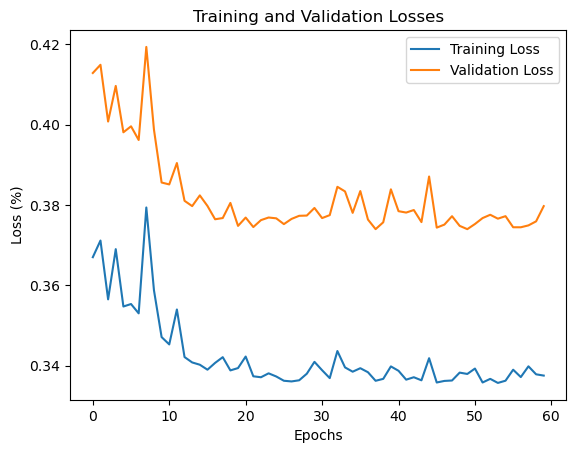

In [5]:
#RNN
class RNN(nn.Module):
    def __init__(self, hidden_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = 1
        self.output_size = 1
        net = lambda n_in,n_out: nn.Sequential(nn.Linear(n_in,hidden_size), \
                                               nn.Sigmoid(), \
                                               nn.Linear(hidden_size,n_out)).double() #new short hand
        self.h2h = net(self.input_size + hidden_size, self.hidden_size) #b=)
        self.h2o = net(self.input_size + hidden_size, self.output_size) #b=)
                                                                        #[:,0] should be called after use of h2o

    def forward(self, inputs):
        #input.shape == (N_batch, N_time)
        hidden = torch.zeros(inputs.shape[0], self.hidden_size, dtype=torch.float64) #c)
        outputs = [] #c)
        for i in range(inputs.shape[1]): #c)
            u = inputs[:,i] #shape = (N_batch,) #c)
            combined = torch.cat((hidden, u[:,None]), dim=1) #c) #shape = (N_batch,hidden_size+1)
            outputs.append(self.h2o(combined)[:,0]) #c)
            hidden = self.h2h(combined) #c)
        return torch.stack(outputs,dim=1) #c)
        

# Training
n_hidden_nodes = 32
epochs = 60
n_burn = nfuture -1
batch_size = 64 #Xtrain.shape[1]

model = RNN(n_hidden_nodes) 
optimizer = torch.optim.Adam(model.parameters()) 
Utrain, Uval, Ytrain_RNN, Yval_RNN = [torch.as_tensor(x) for x in [Utrain, Uval, Ytrain_RNN, Yval_RNN]] 

ids = np.arange(len(Utrain),dtype=int) 

train_losses = []
val_losses = []
best_val_loss = 10000

for epoch in range(epochs):
    np.random.shuffle(ids) #inspace shuffle of the ids of the training set to select a random subset 
    for i in range(0,len(Utrain),batch_size):
        ids_now = ids[i:i+batch_size] #the ids of the current batch
        Uin = Utrain[ids_now] #d)
        Y_real = Ytrain_RNN[ids_now] #d)

        Y_predict = model.forward(inputs=Uin)


        residual = Y_real - Y_predict #d)
        Loss = torch.mean(residual[:,n_burn:]**2) #d)

        
        optimizer.zero_grad()  #d)
        Loss.backward()  #d)
        optimizer.step()  #d)

    
    with torch.no_grad(): #monitor
        Loss_val = torch.mean((model(inputs=Uval)[:,n_burn:] - Yval_RNN[:,n_burn:])**2)**0.5
        Loss_train = torch.mean((model(inputs=Utrain)[:,n_burn:] - Ytrain_RNN[:,n_burn:])**2)**0.5
        print(f'epoch={epoch}, Validation NRMS={Loss_val.item():.2%}, Train NRMS={Loss_train.item():.2%}')

        val_losses.append(Loss_val.item())
        train_losses.append(Loss_train.item())

        if Loss_val < best_val_loss:
            best_val_loss = Loss_val
            best_val_epoch = epoch
            #torch.save(model.state_dict(), f"best_model.pth") #saving the model too much was giving issues
            

torch.save(model.state_dict(), "rnn_model.pth")

# Plot the losses
plt.plot(range(epochs), [loss for loss in train_losses], label='Training Loss')
plt.plot(range(epochs), [loss for loss in val_losses], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [6]:
# # Printing best validation and epoch
# print("Lowest Validation:", best_val_loss)
# print("Epoch", best_val_epoch) # We can use this to retrain the model with this number of epochs

# #model = Network(Xtrain.shape[1], n_hidden_nodes)
# #model.load_state_dict(torch.load("final_model.pth"))

# model = RNN(n_hidden_nodes) 
# model.load_state_dict(torch.load("rnn_model.pth"))


# ystar = model(Uval)
# print(Uval.shape)
# print(ystar.shape)

# print('Prediction:', float(ystar[0]))
# print('Solution', float(Yval_RNN[0]))
        

In [7]:
out = np.load('../gym-unbalanced-disk/disc-benchmark-files/training-val-test-data.npz')
th_train = out['th'] #th[0],th[1],th[2],th[3],...
u_train = out['u'] #u[0],u[1],u[2],u[3],...

# data = np.load('test-prediction-submission-file.npz')
data = np.load('../gym-unbalanced-disk/disc-benchmark-files/hidden-test-prediction-submission-file.npz')
upast_test = data['upast'] #N by u[k-15],u[k-14],...,u[k-1]
thpast_test = data['thpast'] #N by y[k-15],y[k-14],...,y[k-1]
# thpred = data['thnow'] #all zeros

#Xtrain, Ytrain = create_IO_data(u_train, th_train, na, nb)
#Xtrain = torch.tensor(Xtrain, dtype=torch.float64)

#reg = Network(Xtrain.shape[1], n_hidden_nodes)
#reg.load_state_dict(torch.load("final_model.pth"))

nfuture = 5 #We only want the next output
convert = lambda x: [torch.tensor(xi,dtype=torch.float64) for xi in x]
U_RNN, Y_RNN = convert(make_OE_data(u_train, th_train, nf=nfuture))

# U_RNN = torch.tensor(U_RNN, dtype=torch.float64)
# Y_RNN = torch.tensor(Y_RNN, dtype=torch.float64)


reg = RNN(n_hidden_nodes) 
reg.load_state_dict(torch.load("rnn_model.pth"))

Ytrain_pred = reg(U_RNN)

Ytrain_pred = Ytrain_pred.detach().numpy()
Y_RNN = Y_RNN.detach().numpy()


print('train prediction errors:')
print('RMS:', np.mean((Ytrain_pred-Y_RNN)**2)**0.5,'radians')
print('RMS:', np.mean((Ytrain_pred-Y_RNN)**2)**0.5/(2*np.pi)*360,'degrees')
print('NRMS:', np.mean((Ytrain_pred-Y_RNN)**2)**0.5/Ytrain.std()*100,'%')

#only select the ones that are used in the example
Xtest = np.concatenate([upast_test[:,15-nb:], thpast_test[:,15-na:]],axis=1)
Xtest = torch.tensor(Xtest, dtype=torch.float64)

Ypredict = reg(Xtest)
Ypredict = Ypredict.detach().numpy()

assert len(Ypredict)==len(upast_test), 'number of samples changed!!'

np.savez('../gym-unbalanced-disk/disc-benchmark-files/hidden-test-prediction-example-submission-file.npz', upast=upast_test, thpast=thpast_test, thnow=Ypredict)


train prediction errors:
RMS: 0.6003465642386993 radians
RMS: 34.39732437605703 degrees
NRMS: 125.57851701694163 %


In [8]:
# Simulation
out = np.load('../gym-unbalanced-disk/disc-benchmark-files/training-val-test-data.npz')
th_train = out['th'] #th[0],th[1],th[2],th[3],...
u_train = out['u'] #u[0],u[1],u[2],u[3],...

data = np.load('../gym-unbalanced-disk/disc-benchmark-files/hidden-test-simulation-submission-file.npz')
u_test = data['u']
th_test = data['th'] #only the first 50 values are filled the rest are zeros


#Xtrain, Ytrain = create_IO_data(u_train, th_train, na, nb)
#Xtrain = torch.tensor(Xtrain, dtype=torch.float64)
#reg = Network(Xtrain.shape[1], n_hidden_nodes)
#reg.load_state_dict(torch.load("final_model.pth"))

nfuture = 1 #We only want the next output
convert = lambda x: [torch.tensor(xi,dtype=torch.float64) for xi in x]
U_RNN, Y_RNN = convert(make_OE_data(u_train, th_train, nf=nfuture))

# U_RNN = torch.tensor(U_RNN, dtype=torch.float64)
# Y_RNN = torch.tensor(Y_RNN, dtype=torch.float64)


reg = RNN(n_hidden_nodes) 
reg.load_state_dict(torch.load("rnn_model.pth"))

Ytrain_pred = reg(U_RNN)

Ytrain_pred = Ytrain_pred.detach().numpy()
Y_RNN = Y_RNN.detach().numpy()



print('train prediction errors:')
print('RMS:', np.mean((Ytrain_pred-Y_RNN)**2)**0.5,'radians')
print('RMS:', np.mean((Ytrain_pred-Y_RNN)**2)**0.5/(2*np.pi)*360,'degrees')
print('NRMS:', np.mean((Ytrain_pred-Y_RNN)**2)**0.5/Ytrain.std()*100,'%')


def simulation_IO_model(f, ulist, ylist, skip=50):

    upast = ulist[skip-na:skip].tolist() #good initialization
    ypast = ylist[skip-nb:skip].tolist()
    Y = ylist[:skip].tolist()
    for u in ulist[skip:]:
        print("1")
        upast_np = np.array([v.detach().numpy() if isinstance(v, torch.Tensor) else v for v in upast])
        ypast_np = np.array([v.detach().numpy() if isinstance(v, torch.Tensor) else v for v in ypast])
        x = np.concatenate([upast_np, ypast_np], axis=0)
        
        x = torch.tensor(x, dtype=torch.float64)
        ypred = f(x)
        Y.append(ypred[0].detach().numpy().item()) # original: Y.append(ypred.detach().numpy().item()) 
        upast.append(u)
        upast.pop(0)
        ypast.append(ypred)
        ypast.pop(0)
    return np.array(Y)

skip = len(u_train) - 1 # This way we only gets one output per sequence of inputs
# skip = max(na,nb)

th_train_sim = simulation_IO_model(lambda x: reg(x[None,:])[0], u_train, th_train, skip=skip)
print('train simulation errors:')
print('RMS:', np.mean((th_train_sim[skip:]-th_train[skip:])**2)**0.5,'radians')
print('RMS:', np.mean((th_train_sim[skip:]-th_train[skip:])**2)**0.5/(2*np.pi)*360,'degrees')
print('NRMS:', np.mean((th_train_sim[skip:]-th_train[skip:])**2)**0.5/th_train.std()*100,'%')


th_test_sim = simulation_IO_model(lambda x: reg(x[None,:])[0], u_test, th_test, skip=skip)

assert len(th_test_sim)==len(th_test)
np.savez('../gym-unbalanced-disk/disc-benchmark-files/hidden-test-simulation-example-submission-file.npz', th=th_test_sim, u=u_test)

train prediction errors:
RMS: 0.6223071702316233 radians
RMS: 35.655574415001276 degrees
NRMS: 130.17216424948955 %
1
train simulation errors:
RMS: 0.08769937643212412 radians
RMS: 5.024804135489792 degrees
NRMS: 18.295962516110276 %
